Задание   
Используя diabetes-dataset, выполните следующие шаги:

1. Предварительная обработка данных:
    - Очистите данные от пропусков (если они есть), обработайте аномалии и нормализуйте данные, если это необходимо.
    - Разделите датасет на обучающую и тестовую выборки.

2. Построение модели:
    - Используя алгоритм логистической регрессии, постройте модель бинарной классификации для предсказания наличия диабета у пациентов.
    - Обучите модель на обучающем наборе данных.

3. Оценка модели:
    - Вычислите и проанализируйте метрики точности (accuracy), точности (precision), полноты (recall) и F1-меру для обученной модели на тестовых данных.

4. Интерпретация результатов:
    - Опишите, какие выводы можно сделать о производительности модели на основе вычисленных метрик.
    - Обсудите, какие признаки оказали наибольшее влияние на результаты классификации.


In [2]:
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('diabetes-dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# Количество уникальных значений
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                53
Insulin                     182
BMI                         247
DiabetesPedigreeFunction    505
Age                          52
Outcome                       2
dtype: int64

<Axes: ylabel='Diabetes'>

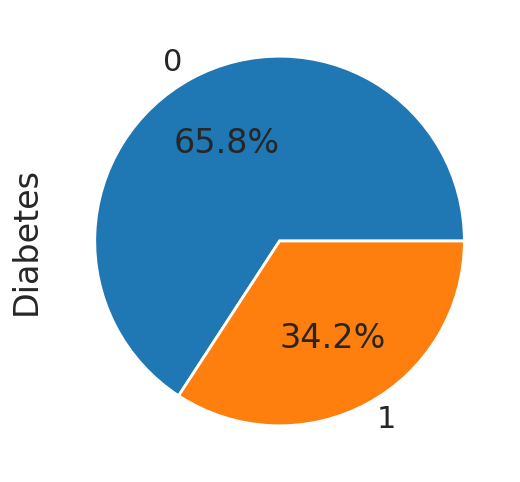

In [9]:
# Смотрим на дисбаланс
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
df.groupby('Outcome').size().plot(kind='pie', y = "Outcome", label = "Diabetes", autopct='%1.1f%%')

<Axes: xlabel='Age', ylabel='count'>

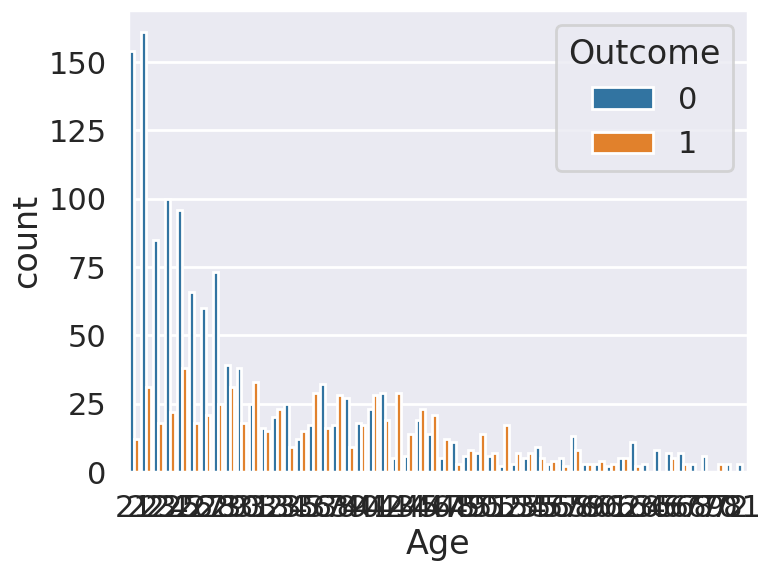

In [11]:
# Смотрим на дисбалансы по возрастам
sns.countplot(x='Age', hue='Outcome', data=df)

#### Видим, что есть дисбалансы по возрастам, при малых значениях возраста перекос в сторону отсутствяи диабета (0), средний возраст наоборот (1)

In [13]:
el = alt.selection_point(fields=["Outcome"])
c1= alt.Chart(df).mark_circle().encode(
    x="Age",
    y="Pregnancies",
    color=alt.Color('Outcome')
)
c2= alt.Chart(df).mark_circle().encode(
    x="Glucose",
    y="Insulin",
    color=alt.Color('Outcome')
)
c1&c2

alt.VConcatChart(...)